In [778]:
from matplotlib import pyplot as plt
from matplotlib import colors as colors
import numpy as np

import sys 
sys.path.append('../')
import Utils.utils as util
from importlib import reload
reload(util)

from sklearn.linear_model import Lasso
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import normalize

np.set_printoptions(threshold=np.inf) #print full arrays

In [779]:
"""
def convert_patch_into_vector(patch):
    h = patch.shape[0]
    #Convert one patch into a column vector for training
    patch = patch.flatten()
    train_y = patch[(h*(h//2)+(h//2))*3:(h*(h//2)+(h//2))*3+3]
    train_x = np.delete(patch, range((h*(h//2)+(h//2))*3, (h*(h//2)+(h//2))*3+3))
    return np.array((train_x, train_y))
"""
    
def convert_patch_into_vector(patch):
    #Convert one patch into a column vector for training
    patch = patch.flatten()

    return np.array(patch)

def convert_vector_into_patch(vector, h):
    #Convert a one column vector into a patch of size h
    return vector.reshape((h,h,7))
    
def convert_patches_into_training_set(patches):
    #Convert a set of patches into a set of vectors
    return np.array(list(map(convert_patch_into_vector, patches))).T

def inpaint_image(noisy_image, dictionary, coord_noisy_pix, h):
    i = 0
    nbiter  = len(coord_noisy_pix)
    for y, x in coord_noisy_pix:
        print( i, " / ", nbiter)
        i = i + 1
        
        print("Correction de x : ", x, " et y : ", y)
        label = util.get_patch(x, y, h, noisy_image)
        print("label = ")
        util.display_im(label)
        label = list(convert_patch_into_vector(label))

        print("--- lasso regression ---")
        model = Lasso(fit_intercept=True,alpha=0.0001,positive=True) #alpha=0.0001,tol=0.001
        model.fit(dictionary, label)
        
        coef = model.coef_.reshape((1,-1)) #poids
        sparse_coef_ = model.sparse_coef_
    
        print(sparse_coef_)
        print("coef shape : ", coef.shape)
        #print("sparse_coef_ shape : ", sparse_coef_.shape)
        print("nb patch not at zero: ", np.count_nonzero(sparse_coef_.toarray()), " / ", coef.shape[1])
        print("dictionary shape : ", dictionary.shape) 
        
        normalized_coefs = normalize(coef, norm='l1')
        #print("normalized_coefs shape = ", normalized_coefs)
        print("sum(normalized_coefs) = ", np.sum(normalized_coefs, axis=1))
        
        res = normalized_coefs*dictionary
        print("coef*dictionary shape= ",res.shape)
        
        resflat = np.sum(normalized_coefs*dictionary,axis=1)
        #print("resflat = ",resflat)
        
        print("sum(normalized_coefs*dictionary,axis=1) shape= ", resflat.shape)
        
        newPixel = get_centered_pixel(resflat, h)
        print("nouveau pixel : ", newPixel)
        print("")
        noisy_image[x][y] = newPixel
        
        #util.display_im(noisy_image) #pour afficher toutes les images

    util.display_im(noisy_image)

def get_centered_pixel(patch, h):
    print("patch shape:", patch.shape)
    print("len(patch) : ", len(patch))
    print("centre = ", (len(patch)//2)-1)
    #Convert one patch into a column vector for training
    vector = patch[((len(patch)//2)-1):((len(patch)//2)-1)+3]
    return [int(x) for x in vector]
    


taille de l'image :  (64, 64, 3)
nbnoisy: 4 ,   nbclear: 437


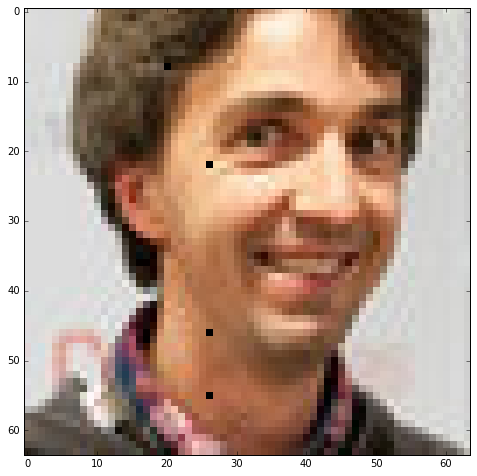

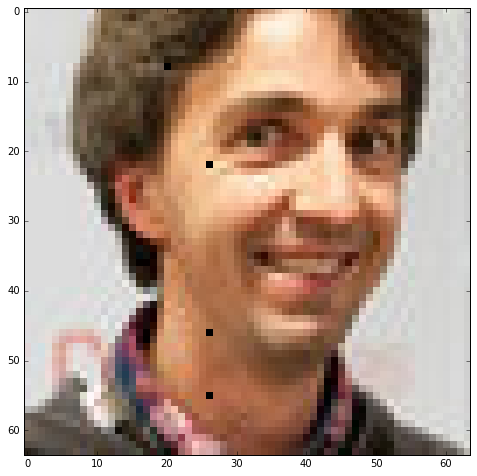

In [780]:
%matplotlib inline
img_matrice = util.read_im("Data/imgdataset/face0.jpg")
print("taille de l'image : ", img_matrice.shape)

util.display_im(img_matrice)

#Taille des patchs
h=3 #nombre impair

#noisy_image = delete_rect(img_matrice, 400, 400, 500, 100)
#display_im(noisy_image)

#display_im(img_matrice)

#util.display_im(util.get_patch(50, 50, 4, img_matrice))

width = img_matrice.shape[0]
height = img_matrice.shape[1]

noisy_image, noise_pixels = util.noise(img_matrice, 0.001, width, height, h)

patches = util.get_patches(noisy_image, h, width, height)

noisy_patches = patches[0]
clear_patches = patches[1]

util.display_im(noisy_image)
#print("New patch : ", convert_patch_into_vector(clear_patches[5]))

nbnoisy = np.shape(noisy_patches)[0]
nbclear = np.shape(clear_patches)[0]

print("nbnoisy:", nbnoisy, ",   nbclear:", nbclear)


In [781]:
training = convert_patches_into_training_set(clear_patches)
print(training.shape)

(27, 437)


0  /  4
Correction de x :  8  et y :  20
label = 
--- lasso regression ---
  (0, 2)	0.94996772328
  (0, 42)	0.672411137518
  (0, 43)	0.187792430658
  (0, 62)	4.09634964398
  (0, 122)	0.0435334755119
  (0, 124)	0.292730369726
  (0, 125)	4.39721800844
  (0, 126)	2.43408785726
  (0, 144)	2.50184055616
  (0, 147)	2.51412232897
  (0, 163)	0.0903048340152
  (0, 165)	1.01550065748
  (0, 186)	3.01036484853
  (0, 207)	1.12791967247
  (0, 210)	1.50452352544
  (0, 211)	0.0708517766905
  (0, 226)	0.299713233949
  (0, 228)	14.7878751464
  (0, 232)	1.54303467479
  (0, 233)	0.202504699211
  (0, 270)	2.8197912026
  (0, 273)	0.146676612084
  (0, 275)	0.0204658578291
  (0, 276)	0.0719520960629
  (0, 291)	7.95517941172
  (0, 292)	5.49472867142
  (0, 293)	1.85779724403
  (0, 295)	1.31962708846
  (0, 296)	5.28579065103
  (0, 297)	0.344256221365
  (0, 318)	0.311982017943
  (0, 327)	0.291855370986
  (0, 329)	0.886421972865
  (0, 337)	0.203987733138
  (0, 358)	0.415463670456
  (0, 372)	0.0291226222476
  (0, 3

/users/Etu7/3262287/.local/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


  (0, 2)	0.305875803461
  (0, 42)	7.93771793704
  (0, 62)	7.60958967305
  (0, 122)	0.517782892837
  (0, 125)	4.89521995367
  (0, 126)	1.44552385948
  (0, 144)	2.18526455251
  (0, 147)	10.1078158031
  (0, 163)	0.065672827896
  (0, 186)	2.76401216577
  (0, 207)	1.78474104487
  (0, 210)	4.54912402214
  (0, 211)	0.511265430157
  (0, 226)	1.42083179021
  (0, 228)	39.2728215722
  (0, 232)	7.61484450322
  (0, 233)	0.291523353207
  (0, 249)	0.551109886375
  (0, 254)	0.201528109824
  (0, 270)	4.57958338704
  (0, 273)	2.82958533816
  (0, 276)	0.29943830104
  (0, 291)	14.1388513621
  (0, 292)	18.4022239204
  (0, 293)	9.30592743005
  (0, 295)	0.43079566368
  (0, 296)	12.1456258601
  (0, 297)	1.06839358446
  (0, 318)	1.05216182379
  (0, 327)	0.836375772358
  (0, 333)	0.0245028558518
  (0, 337)	0.0414818357846
  (0, 355)	0.0464858867114
  (0, 358)	0.629914668776
  (0, 372)	1.40978944093
  (0, 374)	2.66918382754
  (0, 380)	0.300768207382
  (0, 389)	0.766363372931
  (0, 390)	0.458350269057
  (0, 402)	

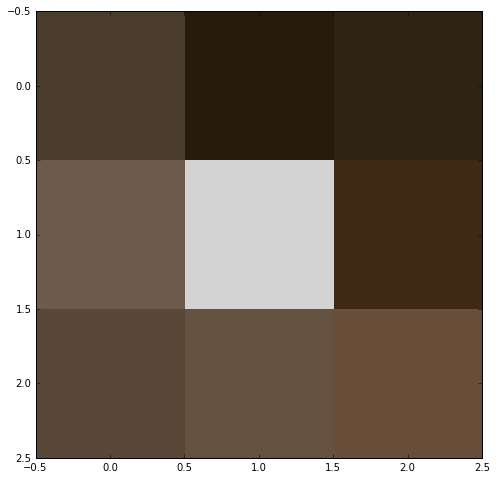

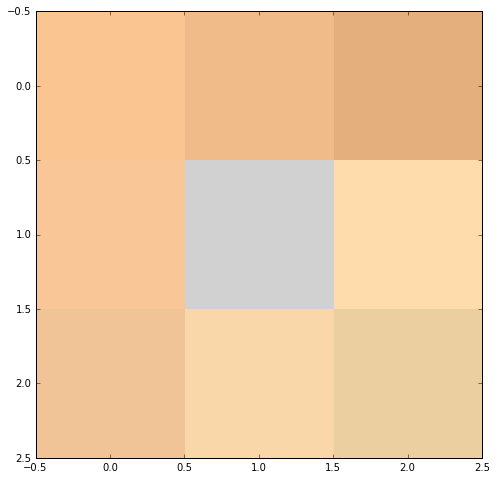

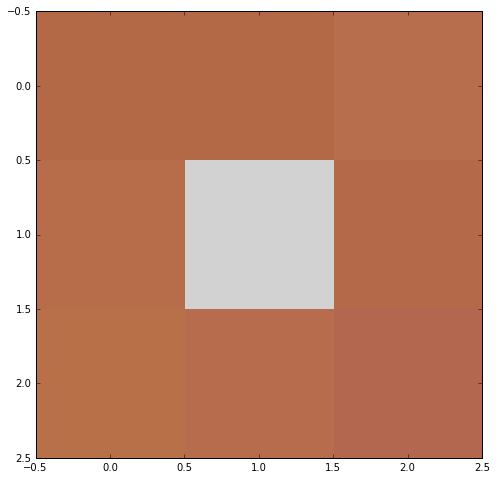

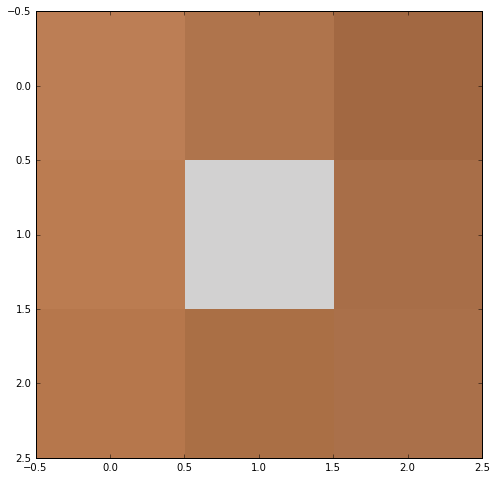

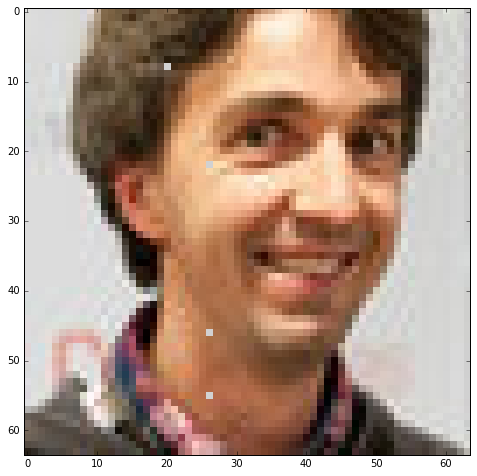

In [782]:
inpaint_image(noisy_image, training, noise_pixels, h)

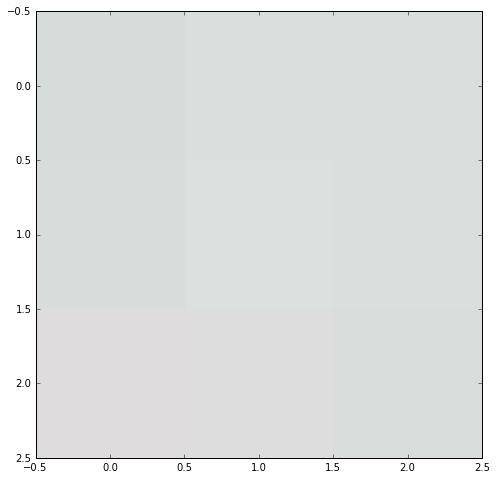

In [783]:
util.display_im(clear_patches[292])